<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/Project6_ratings_Electronics_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic Imports

In [2]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Read and explore the given dataset.

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv', names=['UserId','ProductId','Ratings','Timestamp'])

In [7]:
df.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [8]:
df.shape

(7824482, 4)

In [9]:
df.dtypes

UserId        object
ProductId     object
Ratings      float64
Timestamp      int64
dtype: object

In [10]:
df.isnull().sum()

UserId       0
ProductId    0
Ratings      0
Timestamp    0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


##### Dropping Time stamp as this is not needed as of now.

In [12]:
df.drop(columns= ['Timestamp'], inplace=True)

##### Distinct Users

In [13]:
df.UserId.unique().size

4201696

##### Distinct Products

In [14]:
df.ProductId.unique().size

476002

In [15]:
4201696 * 476002

2000015699392

##### But we have 7824482 records available

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


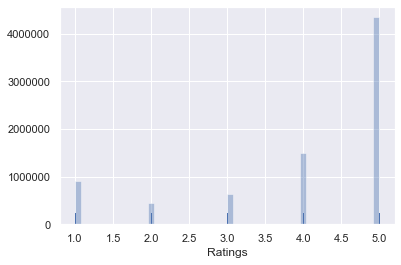

In [ ]:
sns.distplot(df['Ratings'], kde=False, rug=True)

##### Ratings reveals that there are no 0 valued ratings in the given data set. However most people rated 5, and least people rated 2.

In [17]:
df['Ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

##### Top 5 products which were rated by as many number of users

In [18]:
df['ProductId'].value_counts().head()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: ProductId, dtype: int64

##### Top 5 user who rated rated as many number of products

In [19]:
df['UserId'].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: UserId, dtype: int64

# 2. Data Subset

##### Users who has given more than 50 ratings

In [20]:
temp = df['UserId'].value_counts()

In [21]:
user_50_ratings = temp[temp >= 50].index

In [22]:
user_50_ratings

Index(['A5JLAU2ARJ0BO', 'ADLVFFE4VBT8', 'A3OXHLG6DIBRW8', 'A6FIAB28IS79',
       'A680RUE1FDO8B', 'A1ODOGXEYECQQ8', 'A36K2N527TXXJN', 'A2AY4YUOX2N1BQ',
       'AWPODHOB4GFWL', 'A25C2M3QF9G7OQ',
       ...
       'ANEDXRFDZDL18', 'A3HC7NWLKCPX4X', 'A2FZQF0MH29VYN', 'A3UW0PQLDUACMH',
       'A2NYOY6H42SORF', 'A11KQADBYE0UZL', 'A95PWI4S6WHGL', 'A1DSRM2P0WGQNS',
       'A3BY5KCNQZXV5U', 'A28CCQNXWV6WA2'],
      dtype='object', length=1540)

In [23]:
df_subset = df[df.UserId.isin(user_50_ratings)]

In [24]:
df_subset.shape

(125871, 3)

# Popularity Recommender model

In [25]:
df_subset.groupby(['ProductId'])['Ratings'].mean().sort_values(ascending = False)

ProductId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
             ... 
B000VJ0YQ0    1.0
B000MVEBOS    1.0
B000C0OF54    1.0
B005YXXT7Y    1.0
B0080REM4A    1.0
Name: Ratings, Length: 48190, dtype: float64

In [26]:
df_subset[df_subset.ProductId == 'B00LKG1MC8']

,UserId,ProductId,Ratings
7824444,A2BYV7S1QP2YIG,B00LKG1MC8,5.0


##### But the problem here is even a product which was rated only once by an user is coming on top recommendation. This is not a right recomendation. Let us filter the subset such that the product should be rated by atleast 50 users.

In [27]:
temp = df_subset['ProductId'].value_counts()
product_50_ratings = temp[temp >= 50].index
product_50_ratings

Index(['B0088CJT4U', 'B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B00829TIEK',
       'B00829THK0', 'B008DWCRQW', 'B002R5AM7C', 'B004CLYEDC', 'B002SZEOLG',
       'B00834SJNA', 'B004T9RR6I', 'B0034CL2ZI', 'B002V88HFE', 'B00834SJSK',
       'B002WE6D44', 'B00829TIA4', 'B004CLYEFK', 'B009SYZ8OC', 'B0079UAT0A',
       'B0019EHU8G', 'B005CT56F8', 'B000QUUFRW', 'B00DR0PDNE', 'B00HFRWWAM',
       'B005FYNSPK', 'B004CLYEE6', 'B0041Q38NU', 'B001TH7GUU', 'B00ARB5FLQ',
       'B005HMKKH4', 'B002SQK2F2', 'B0015DYMVO', 'B00AQRUW4Q', 'B004CLYEH8',
       'B005CLPP84', 'B003M0NURK', 'B00004ZCJE', 'B000LRMS66', 'B000VX6XL6',
       'B001E1Y5O6', 'B001XURP7W', 'B00BOHNYTW', 'B001CHHVCU', 'B0002L5R78',
       'B00884WH74', 'B000JMJWV2', 'B0082E9K7U', 'B004QK7HI8', 'B009NHWVIA',
       'B00BOHNYU6', 'B001TH7GSW', 'B0074BW614', 'B00007E7JU', 'B005QCDY50',
       'B002QEBMAK', 'B000Q8UAWY', 'B00BGGDVOO', 'B006W8U2MU', 'B005DKZTMG',
       'B00G4UQ6U8', 'B0097CXWUW', 'B002WE4HE2', 'B004Q3R9AQ', 'B0081FLFQE',

In [28]:
df_subset = df_subset[df_subset.ProductId.isin(product_50_ratings)]

In [29]:
df_subset.groupby(['ProductId'])['Ratings'].mean().sort_values(ascending = False)

ProductId
B001TH7GUU    4.871795
B003ES5ZUU    4.864130
B0019EHU8G    4.855556
B006W8U2MU    4.824561
B000QUUFRW    4.809524
                ...   
B00DR0PDNE    3.785714
B00ARB5FLQ    3.730769
B001CHHVCU    3.611940
B006I5MKZY    3.392157
B002SQK2F2    2.987013
Name: Ratings, Length: 77, dtype: float64

## Popularity based Recommendation

In [30]:
df_subset.groupby(['ProductId'])['Ratings'].mean().sort_values(ascending = False).head()

ProductId
B001TH7GUU    4.871795
B003ES5ZUU    4.864130
B0019EHU8G    4.855556
B006W8U2MU    4.824561
B000QUUFRW    4.809524
Name: Ratings, dtype: float64

# 4. Train Test Split

In [31]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618278 sha256=f77a0c89e4325785788a41c3ee2e9deb49fed3e6e2a39ae8c724d296ef0b89e8
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [32]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 5))

In [33]:
df_subset.shape

(6234, 3)

In [34]:
data = Dataset.load_from_df(df_subset[['UserId', 'ProductId', 'Ratings']], reader)

In [36]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=123)

# 5. Collaborative filter model

## SVD based

In [45]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [46]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [47]:
test_pred = svd_model.test(testset)

# 6. Model Evaluation

In [48]:
accuracy.mae(test_pred)

MAE:  1.1537


1.1536523000358427

## KNNWithMeans based

In [49]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


# 6. Model Evaluation

In [50]:
test_pred=algo_i.test(testset)
print(accuracy.mae(test_pred))

MAE:  0.6086
0.608618989768703


### KNNWithMeans gave better results in MAE, and RMSE [ran behind]

# 7. Top 5 Recommendations for Every user

In [57]:
df_subset

,UserId,ProductId,Ratings
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0
72059,AU627A4UGIW6V,B00004ZCJE,5.0
72077,A16RL0RMRF974O,B00004ZCJE,5.0
72121,AR8LWDT6TUKNZ,B00004ZCJE,5.0
72122,AD9ZL63H0VKCZ,B00004ZCJE,5.0
...,...,...,...
7814821,A30KPB2ILF6K6J,B00JP12170,5.0
7814822,AE88D7OM7YU99,B00JP12170,5.0
7814823,A2WLNSZ9U0T1S3,B00JP12170,5.0
7814826,A3M7R4PD0FEPUB,B00JP12170,5.0


In [66]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A2WLNSZ9U0T1S3'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
1846,B00JP12170,5.0,3.613850
1857,B0015DYMVO,5.0,4.169316
763,B002SQK2F2,2.0,2.662591
836,B008DWCRQW,1.0,3.863930


# 8. Insights

1. The samples that I have considered is very less, hence my recommendations are less than 5. Constraint applied: every product should be rated by atleast 50 users. and every user should have rated minimum of 50 products.
2. Model predicts average rating wherever estimation is not possible

3. Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

4. The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.